In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics

In [7]:
# Read the csv file of our dataset with observation_date as the row index
ur_df = pd.read_csv('datasets/bachelor_unemployment_rate_sub.csv', index_col=0,  parse_dates=True, squeeze=True)

In [11]:
# Preview the data to get the idead of the values in it and sample size
print("The first 5 rows of the data frame:")
(ur_df.head())
print("\nThe last 5 rows of the data frame:")
print(ur_df.tail())
print("\nThe number of rows in the data frame: ", ur_df.shape)

The first 5 rows of the data frame:

The last 5 rows of the data frame:
observation_date
2021-01-12    2.2
2022-01-01    2.5
2022-01-02    2.9
2022-01-03    2.3
2022-01-04    2.6
Name: unemployment_rate, dtype: float64

The number of rows in the data frame:  (268,)


In [13]:
# Check if the data is indexed as DatetimeIndex
print(ur_df.index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
               '2021-01-11', '2021-01-12', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04'],
              dtype='datetime64[ns]', name='observation_date', length=268, freq=None)


Plot the data to check if the __stationary__ (constan mean and variance). As _many time series models_ require the data to be __stationary__

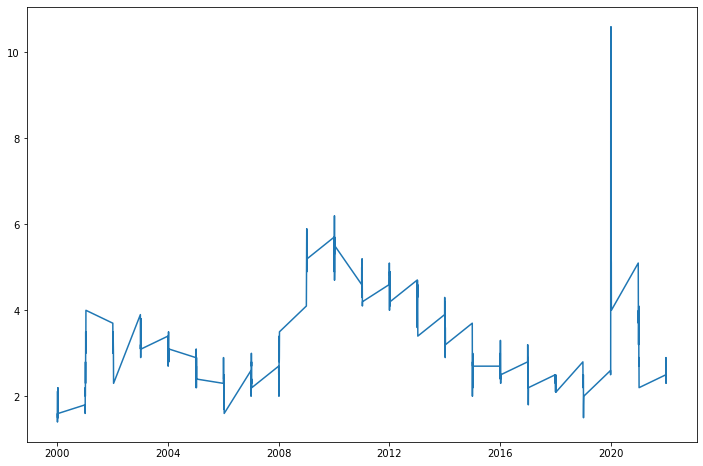

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(ur_df)
plt.show()

Difference the data to make it more stationary and plot it to check if the data looks more _stationary_

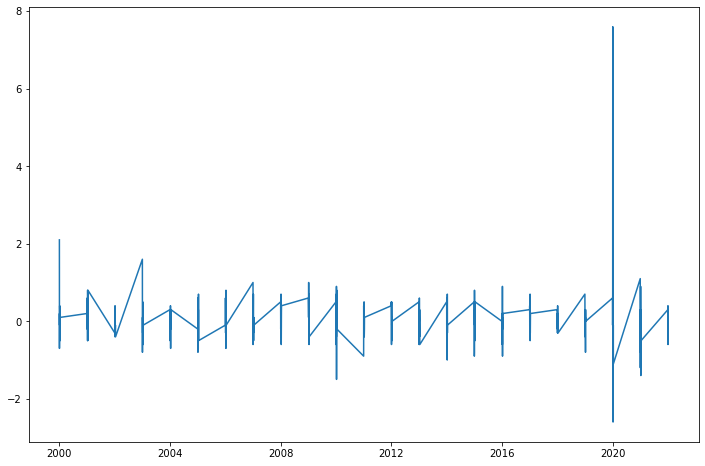

In [15]:
diff1_ur_df = ur_df.diff().fillna(ur_df)
plt.figure(figsize=(12, 8))
plt.plot(diff1_ur_df)
plt.show()

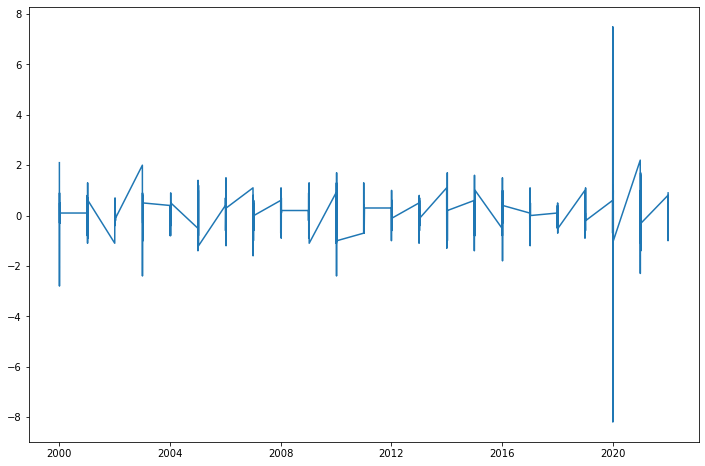

In [16]:
diff2_ur_df = diff1_ur_df.diff().fillna(diff1_ur_df)
plt.figure(figsize=(12, 8))
plt.plot(diff2_ur_df)
plt.show()

Check ACF and PACF plots to determine number of AR terms and MA terms in ARMA model, or to spot seasonality/periodic trend.
Autoregressive forecast the next timestamp's value by regressing the previous values.
Moving Average forecast the next timestamp's value by averaging the previous values.
Autoregressive Integrated Moving Average is useful for non-stationary data, plus has an additional seasonal differencing parameter for seasonal non-stationary data.
ACF and PACF plots include 95% Confidence Interval bands.
Anything outside of the CI shaded bands is a statistically significant correlation.
If we see a significant spike at lag x in the ACF that helps determine the number of MA terms.
If we see a significant spike at lag x in the PACF that helps us determine the number of AR terms.

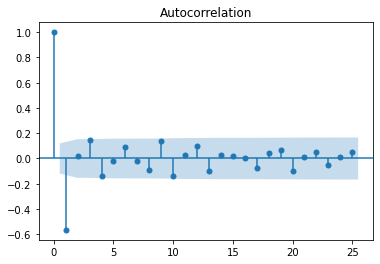

In [18]:
plot_acf(diff2_ur_df)
plt.show()

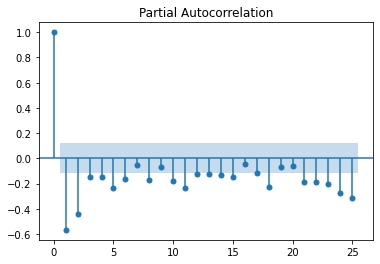

In [19]:
plot_pacf(diff2_ur_df)
plt.show()

Depending of ACF and PACF, create ARMA/ARIMA model with AR and AM terms. This will infer the frequency, so make sure there are no gaps between datatime

In [21]:
ARMA1model_ur_df = ARIMA(ur_df, order=(5,2,1)).fit(transparams=False)
# If the p-value for a AR/MA coef is > 0.05, it's not significant enough to keep in the model. Might want to re-model using only significant terms
print(ARMA1model_ur_df.summary())

c:\Users\Rodri\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\Rodri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                              ARIMA Model Results                               
Dep. Variable:     D2.unemployment_rate   No. Observations:                  266
Model:                   ARIMA(5, 2, 1)   Log Likelihood                -271.501
Method:                         css-mle   S.D. of innovations              0.663
Date:                  Thu, 23 Jun 2022   AIC                            559.002
Time:                          13:30:51   BIC                            587.669
Sample:                               2   HQIC                           570.519
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0002      0.000     -0.463      0.643      -0.001       0.001
ar.L1.D2.unemployment_rate    -0.1504      0.061     -2.469      0.